<a href="https://colab.research.google.com/github/victorhcunha/ArvoreDeDecisao/blob/main/arvorededecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz #arvoredeDecisao e #renderizacao
from sklearn.model_selection import train_test_split #divisaoDadosDeTeste
from sklearn import metrics
import numpy as np
# Renderização gráfica
import pydot
import graphviz
# Renderização interativa
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [ ]:
# Carregando a base de dados:
data = pd.read_csv('iris.data')
data.head()

# Mostrando informações da base de dados:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(data.drop("class",axis=1),data["class"],test_size=0.3)

# Mostrando a forma dos dados:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(105, 4) (45, 4)
(105,) (45,)


In [ ]:


# Instânciando o objeto classificador:
classifier = DecisionTreeClassifier()

# Treinando o modelo de arvore de decisão:
classifier = classifier.fit(X_train,y_train)

# Verificando os atributos mais importantes/relevantes para o modelo treinado:
print(classifier.feature_importances_)

for feature,importancia in zip(data.columns,classifier.feature_importances_):
    print("{}:{}".format(feature, importancia))


[0.01429739 0.01906318 0.04055877 0.92608066]
sepal length in cm:0.014297385620915034
sepal width in cm:0.01906318082788671
petal length in cm:0.040558774014656386
petal width in cm:0.9260806595365418


In [ ]:

# Executando o método predict:
resultado = classifier.predict(X_test)
print(resultado)

# Relatório de métricas:
print(metrics.classification_report(y_test,resultado))



['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.85      0.92        13

       accuracy        

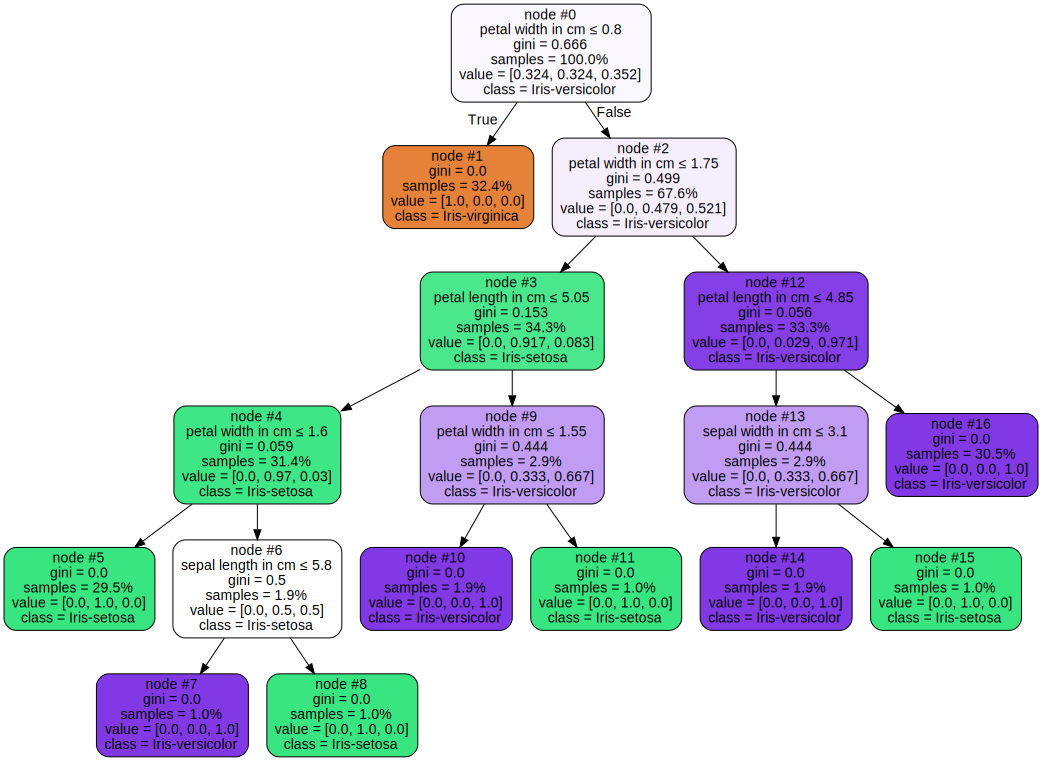

In [ ]:
# Renderização de Árvore:
dot_data = export_graphviz( 
         classifier, 
         out_file=None,
         feature_names=data.drop('class',axis=1).columns,
         class_names=['Iris-virginica','Iris-setosa', 'Iris-versicolor'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )

graph = graphviz.Source(dot_data)  
graph